In [1]:
import mne
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
raw = mne.io.read_raw_bdf(r'C:\Users\Diya Ghorpade\Research Project\Signal Processing\EEG_Cat_Study4_II_II_S1 (1).bdf',preload=True)

Extracting EDF parameters from C:\Users\Diya Ghorpade\Research Project\Signal Processing\EEG_Cat_Study4_II_II_S1 (1).bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 389887  =      0.000 ...  1522.996 secs...


Using matplotlib as 2D backend.


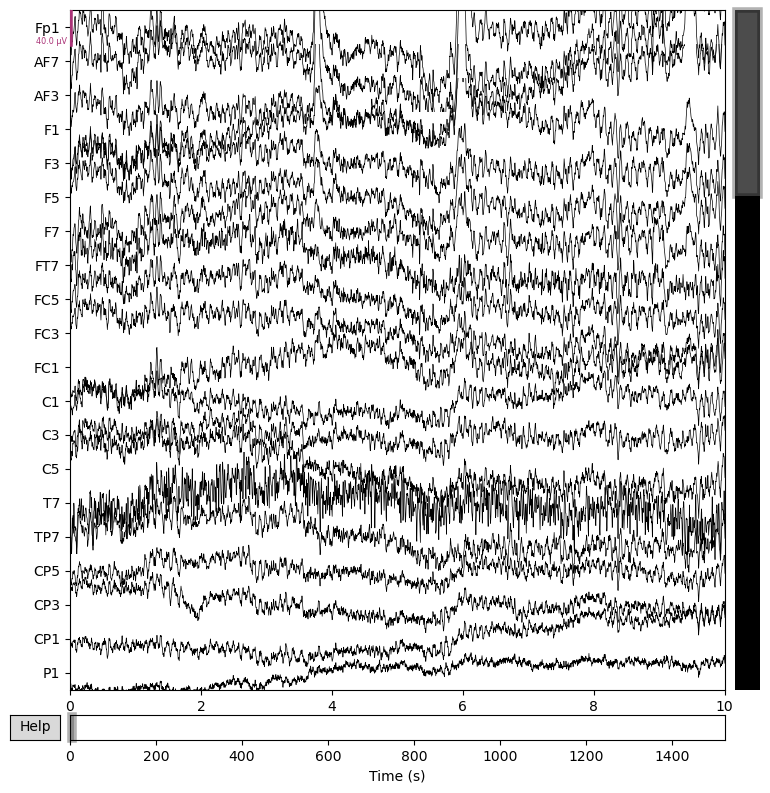

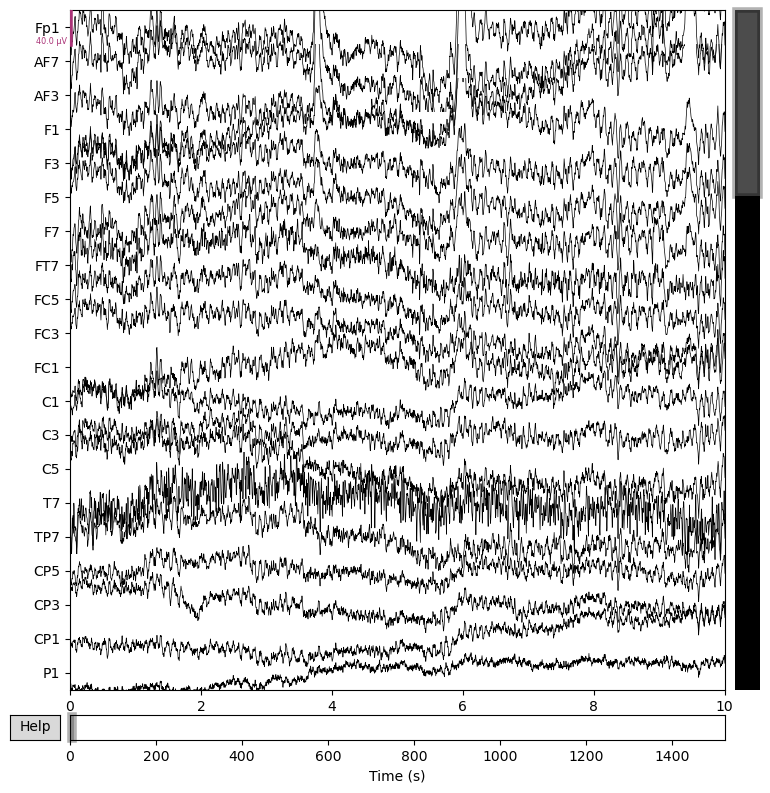

In [5]:
raw.plot()

In [7]:
raw.filter(1, 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s


<RawEDF | EEG_Cat_Study4_II_II_S1 (1).bdf, 73 x 389888 (1523.0 s), ~217.2 MiB, data loaded>

In [15]:
eeg_chans = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']
eog_chans = ['LVEOG', 'RVEOG', 'LHEOG', 'RHEOG']

In [17]:
eeg_data = raw.get_data(picks=eeg_chans)
eog_data = raw.get_data(picks=eog_chans)
times = raw.times

In [19]:
print(f"EEG shape: {eeg_data.shape}, EOG shape: {eog_data.shape}")

EEG shape: (10, 389888), EOG shape: (4, 389888)


In [21]:
clean_eeg = np.zeros_like(eeg_data)

In [23]:
for i, chan in enumerate(eeg_data):
    model = LinearRegression()
    model.fit(eog_data.T, chan)  # EOG -> EEG regression
    artifact_pred = model.predict(eog_data.T)
    clean_eeg[i] = chan - artifact_pred

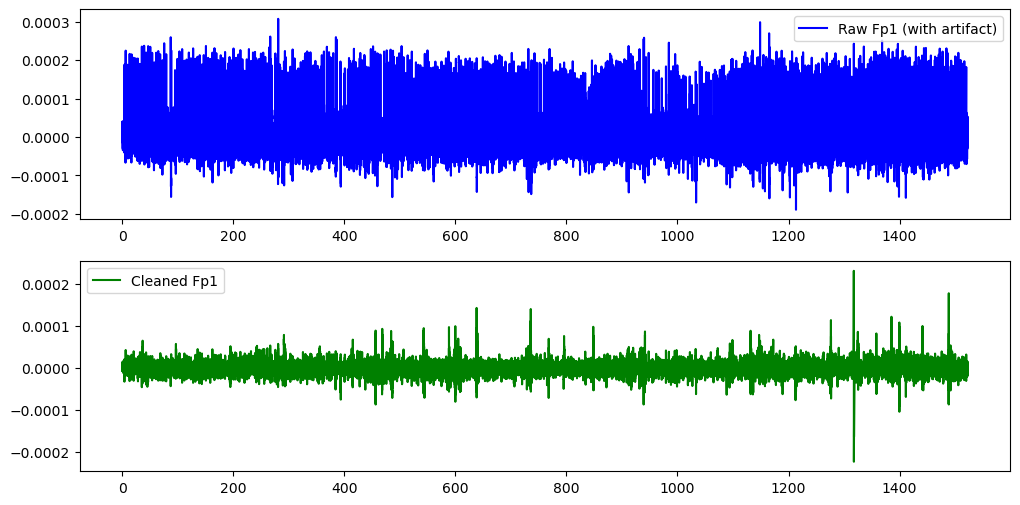

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times, eeg_data[0], 'b', label='Raw Fp1 (with artifact)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times, clean_eeg[0], 'g', label='Cleaned Fp1')
plt.legend()
plt.show()